In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pywt
hor_len=12
vert_len=3

In [14]:
dataset = pd.read_csv("../datasets/ibm_returns.csv", header=None, index_col=0)

In [15]:
abs_log_returns = np.abs(dataset[dataset.columns[0]])

In [16]:
abs_log_returns.dropna().shape

(368,)

# SWT

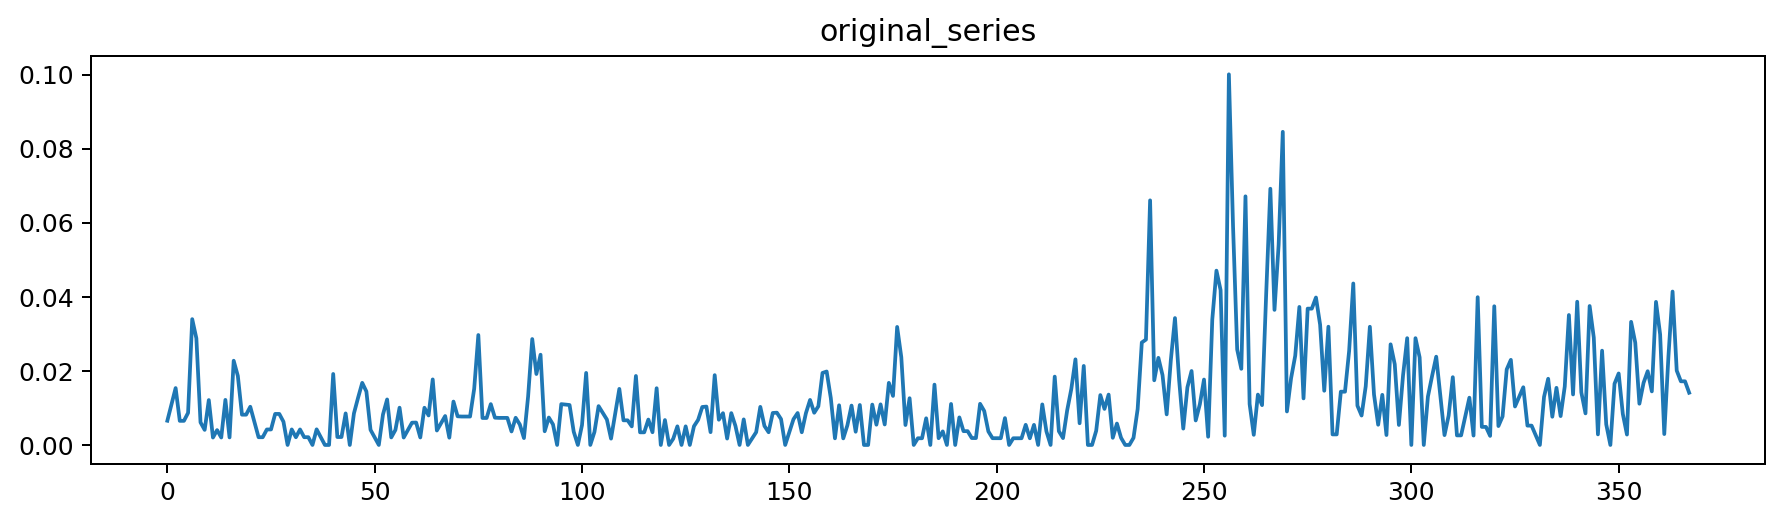

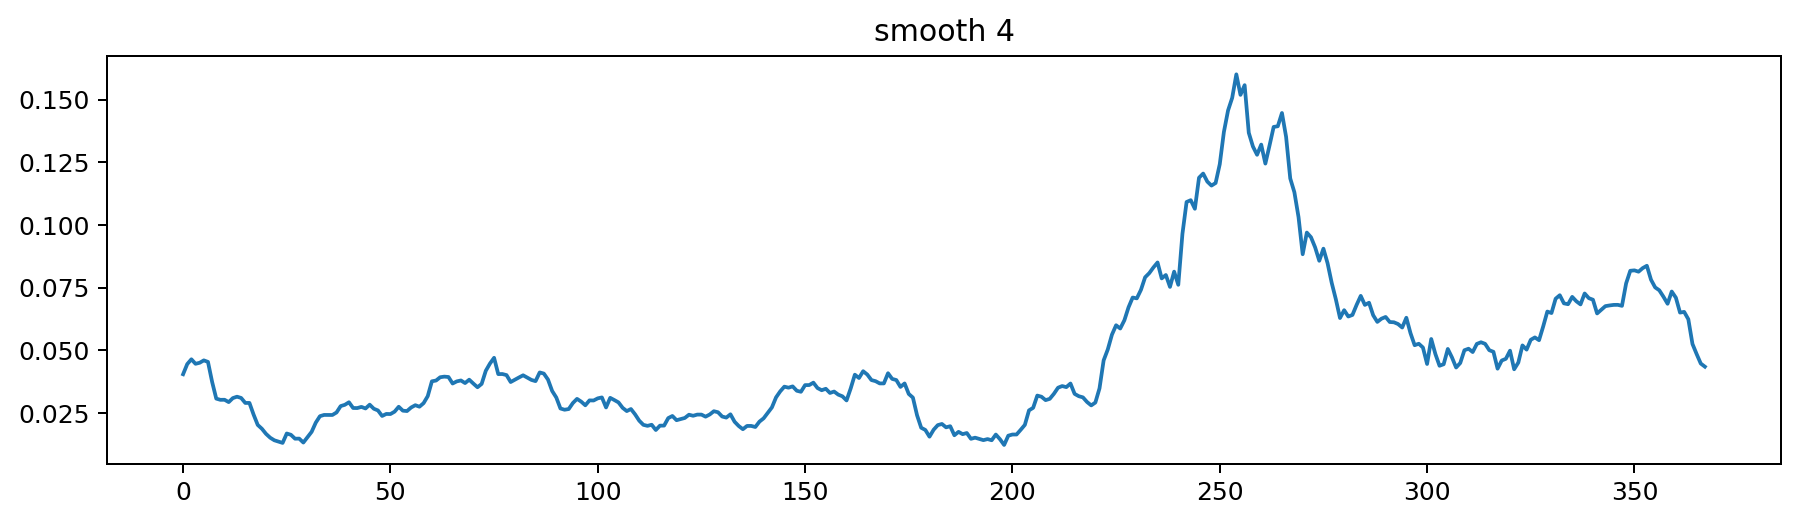

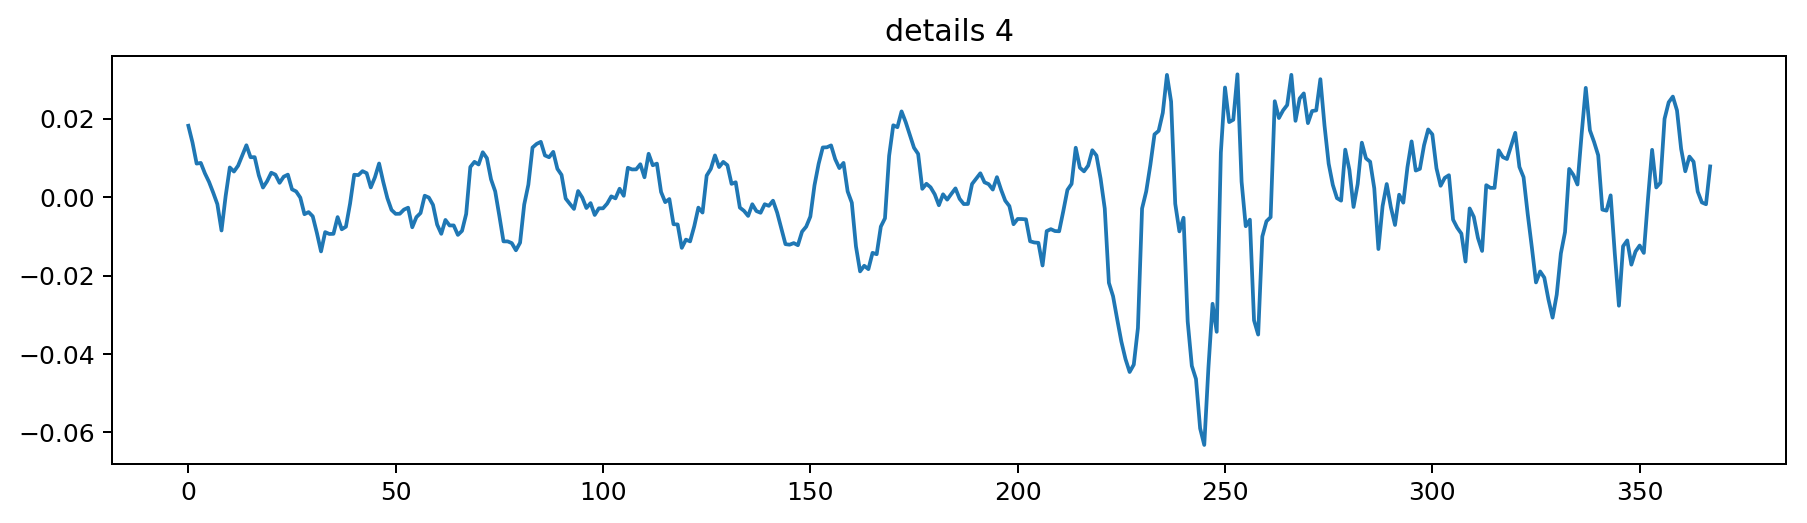

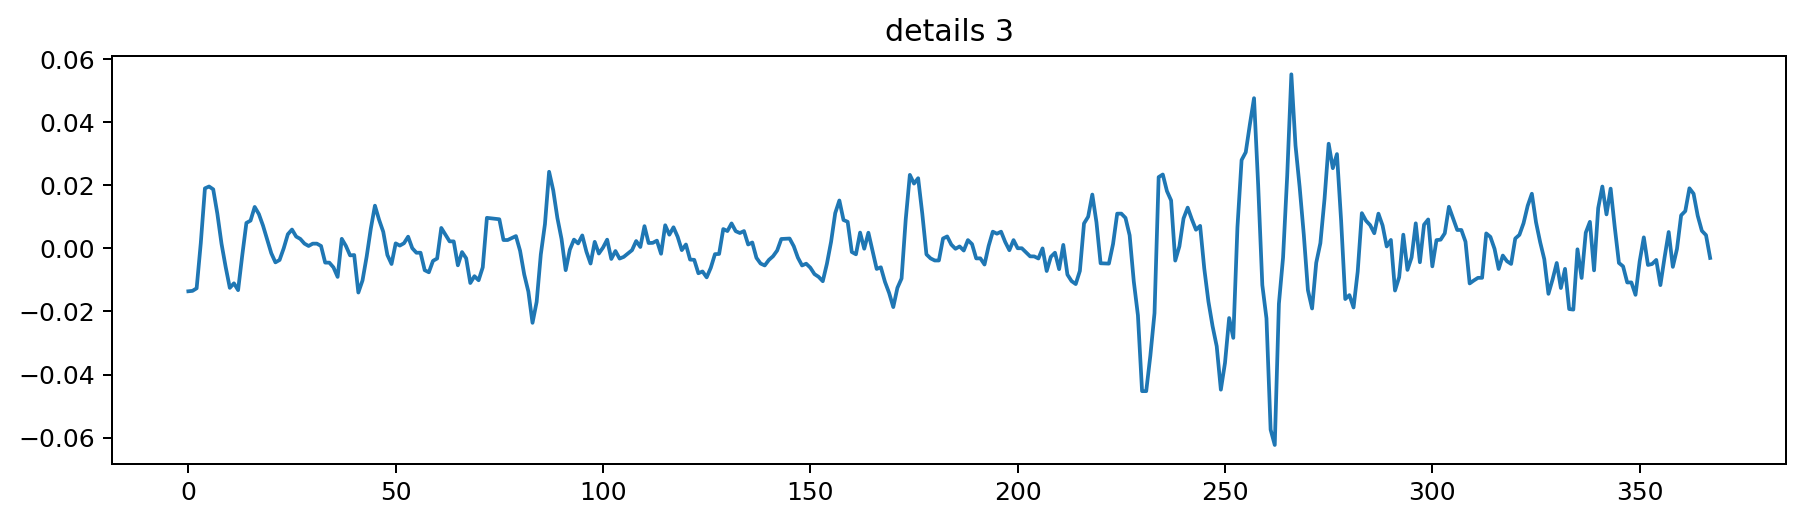

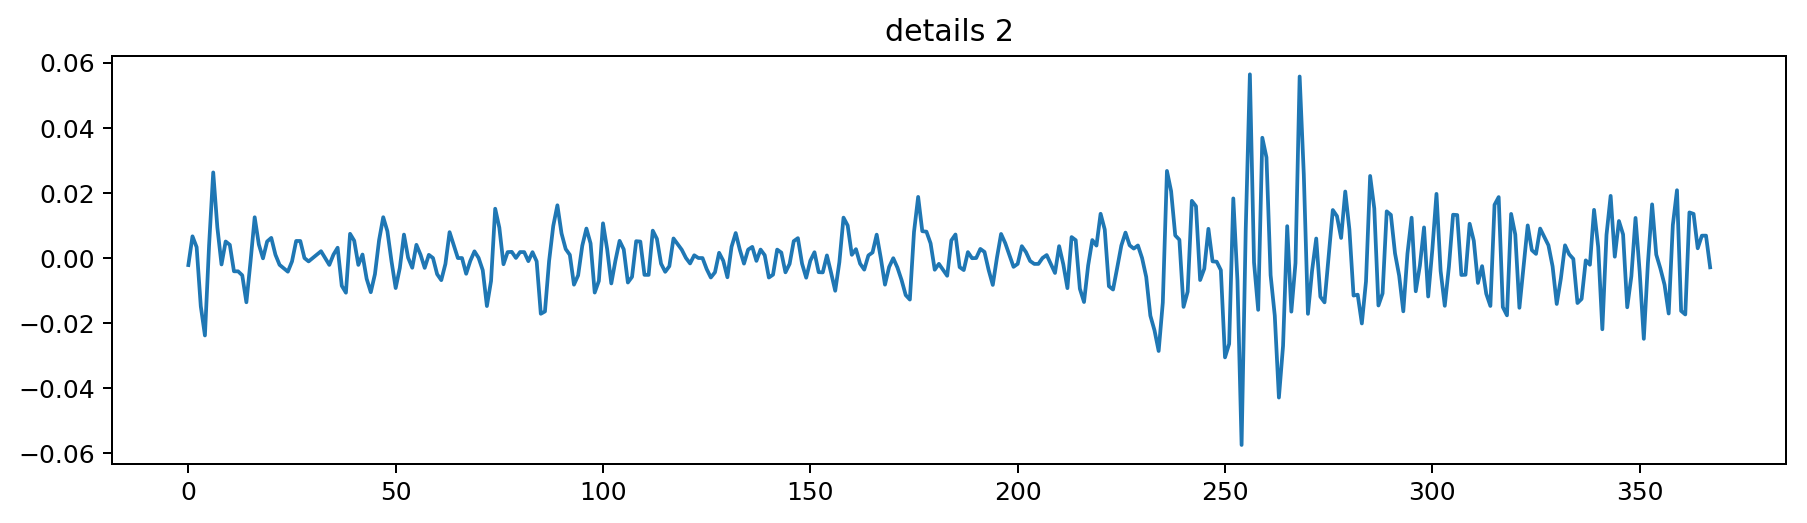

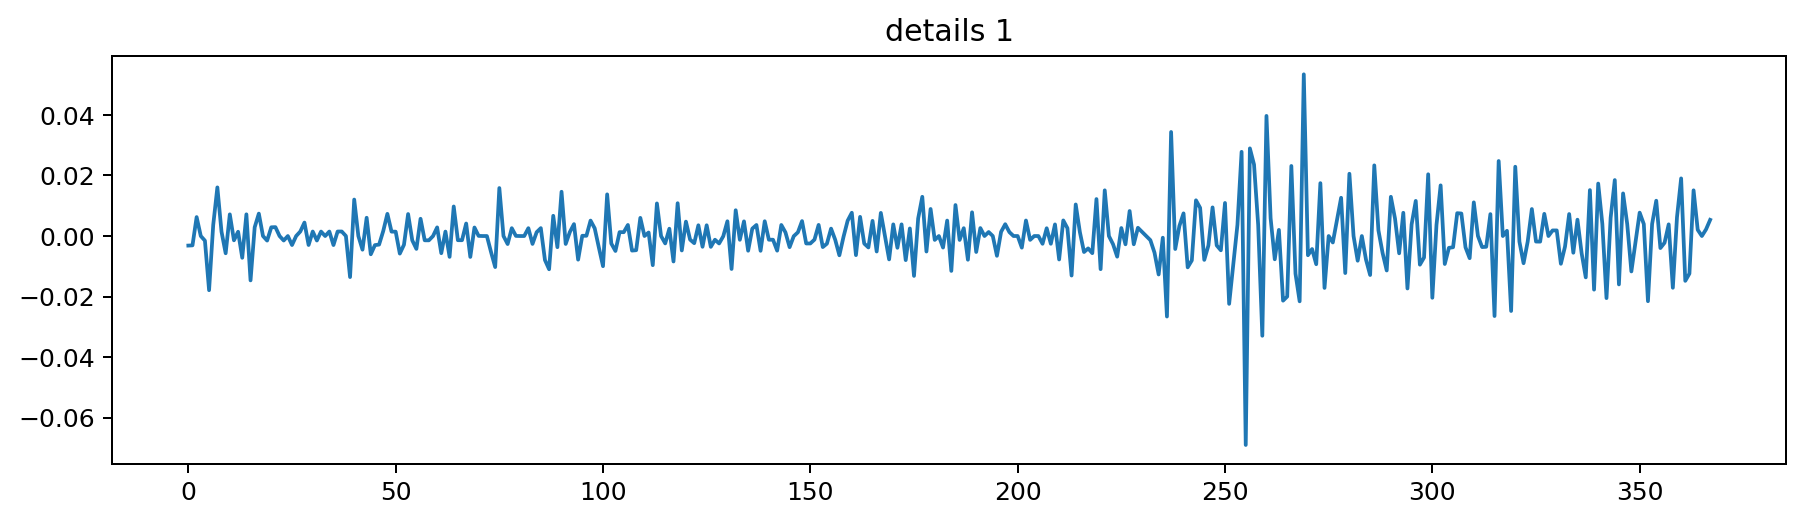

In [23]:
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()
data_transformed = pywt.swt(v_n, "haar", level=4)
for j in range(4):
    a, d = data_transformed[j]
    if j == 0:
        figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    
        plt.title("smooth "+str(4-j))
        plt.plot(a)
        plt.show()
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    
    plt.title("details "+str(4-j))
    plt.plot(d)
    plt.show()

    '''
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')

    plt.title("smooth "+str(4-j))
    plt.plot(a)
    plt.show()'''

# DWT

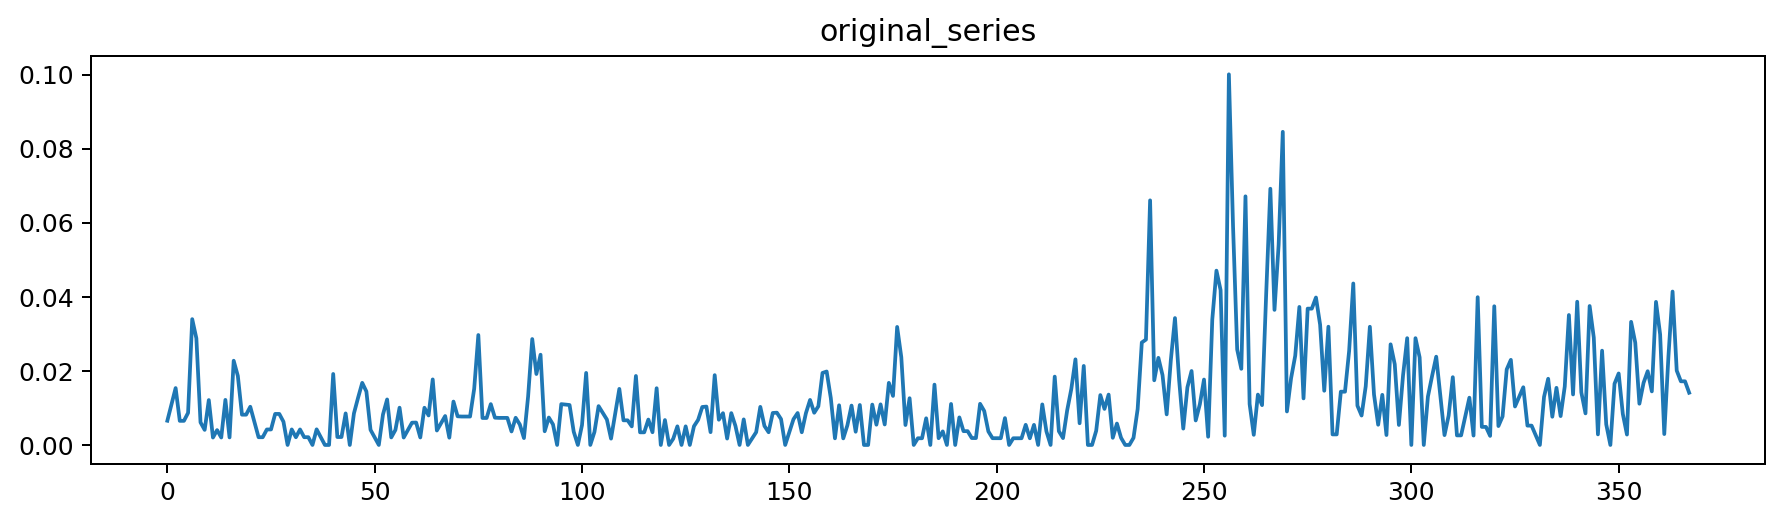

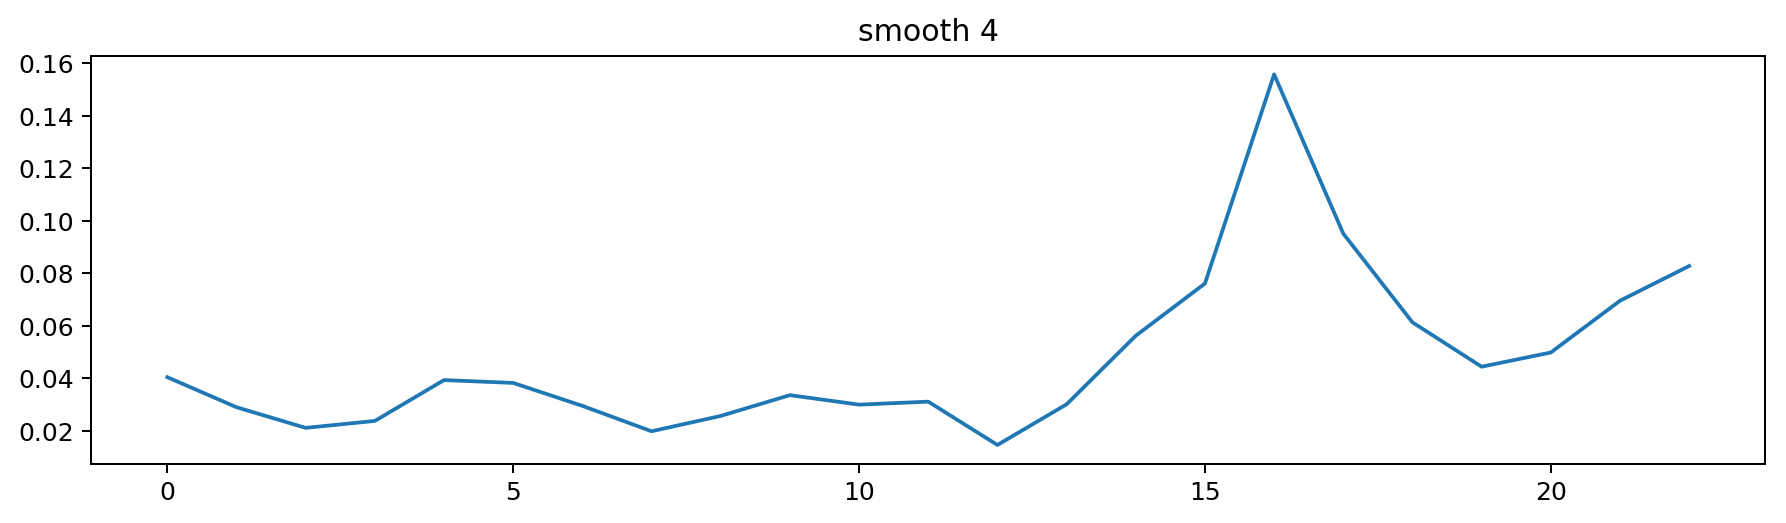

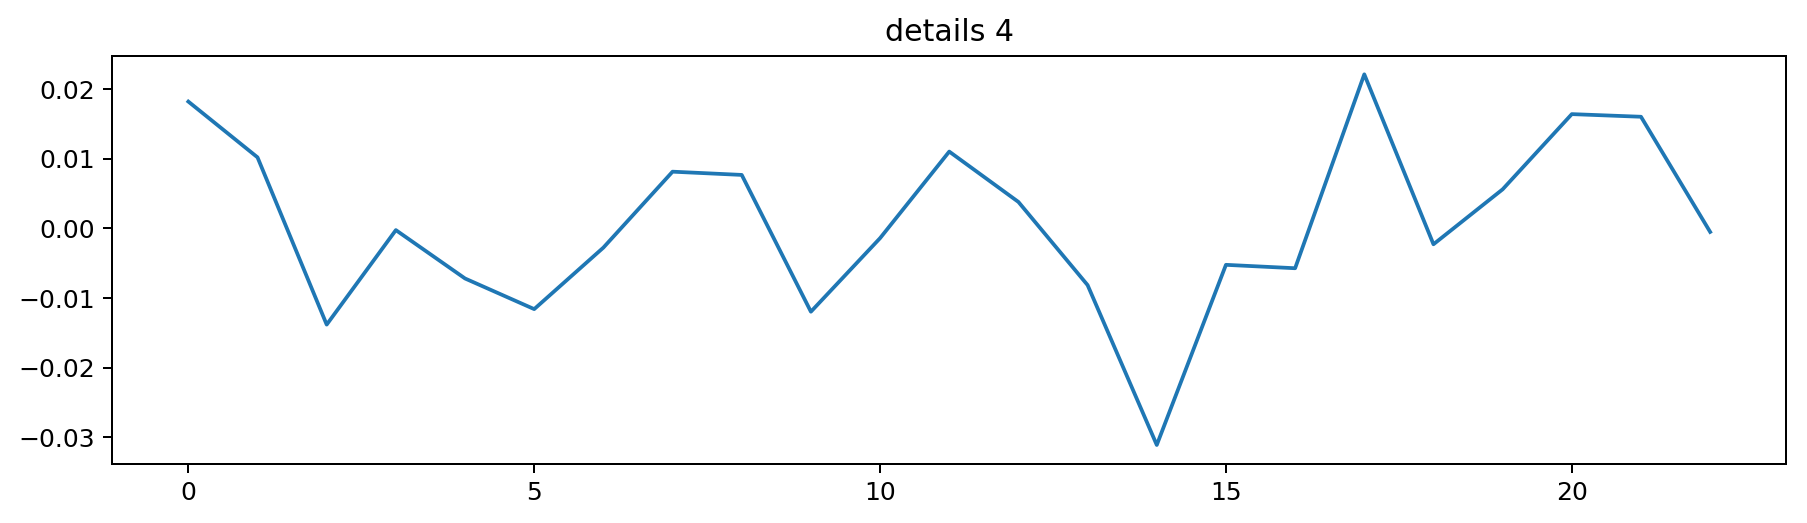

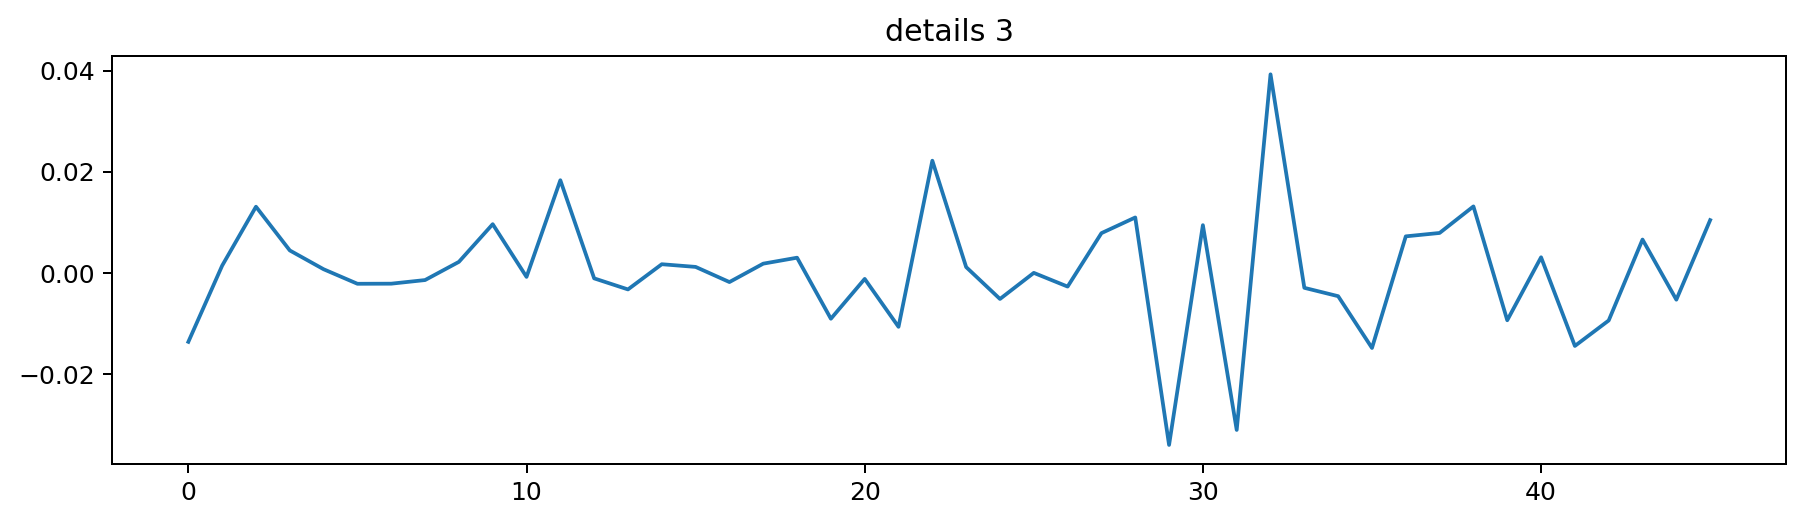

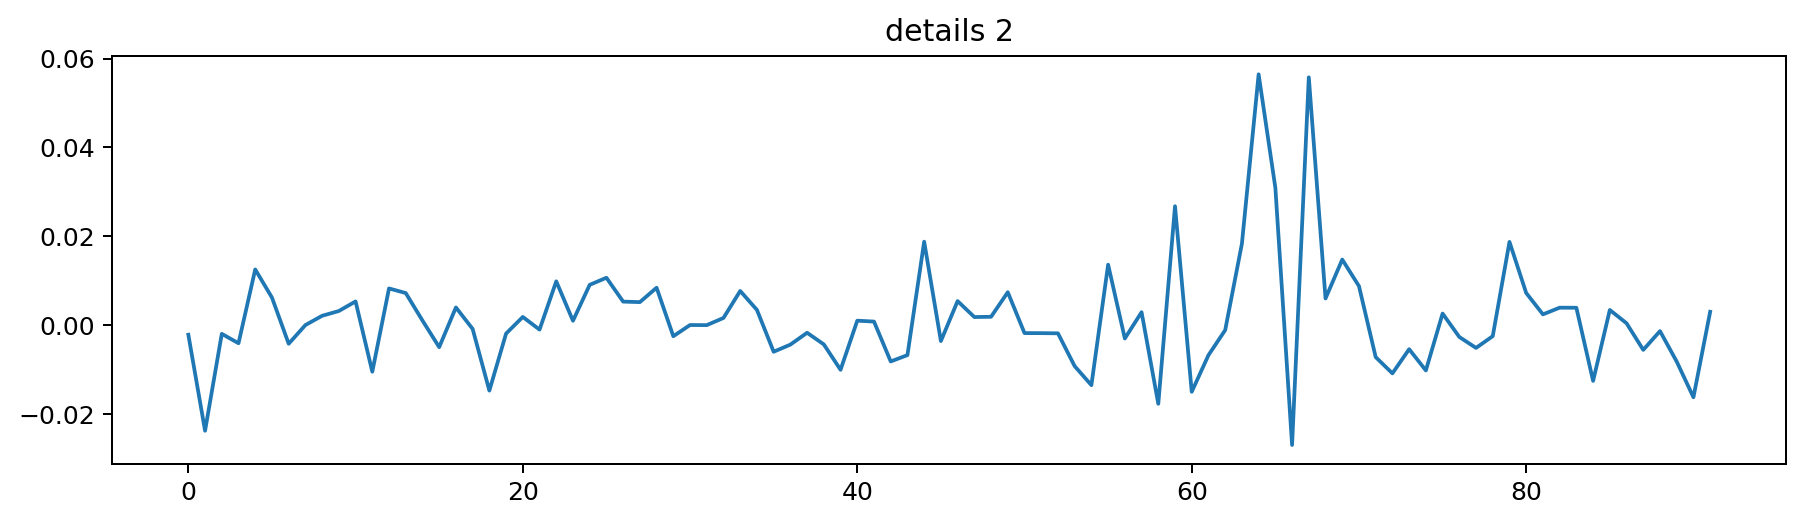

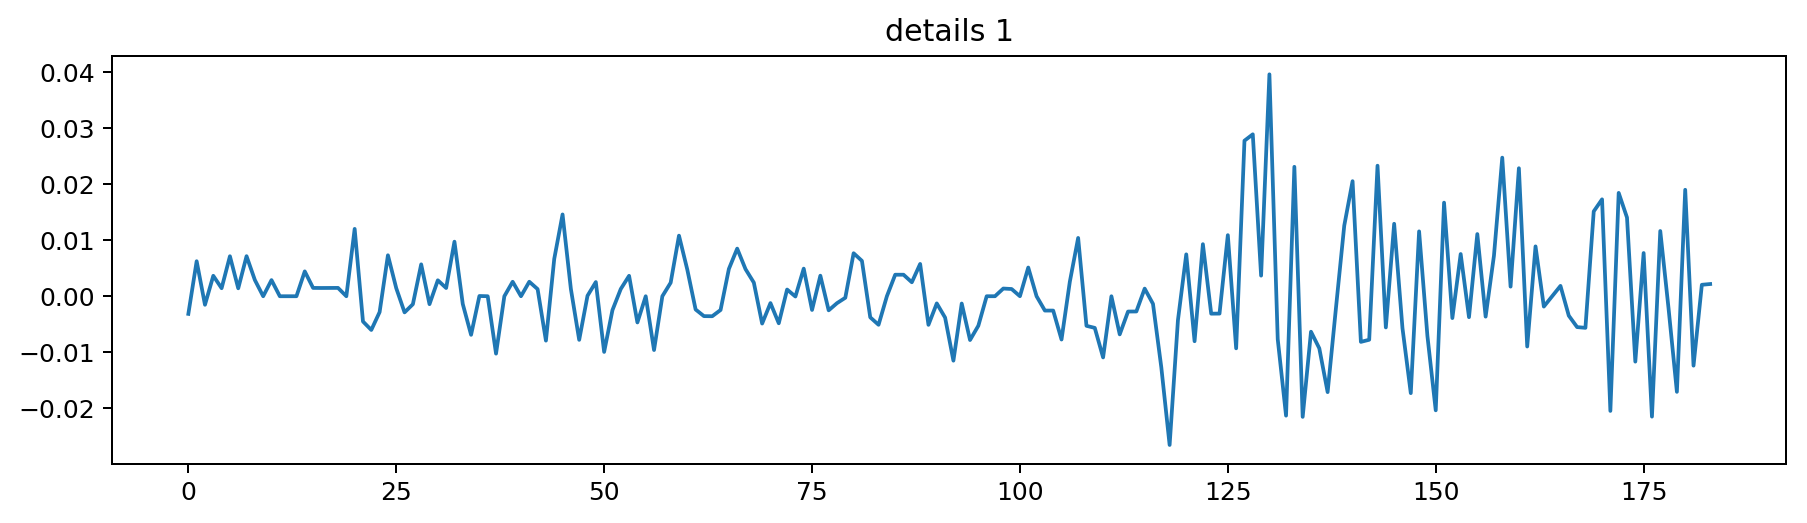

In [24]:
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()
data_transformed = pywt.wavedec(v_n, "haar", level=4)
a = data_transformed[0]
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.title("smooth "+str(4))
plt.plot(a)
plt.show()
for j in range(4):
    d = data_transformed[j+1]
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    
    plt.title("details "+str(4-j))
    plt.plot(d)
    plt.show()

In [25]:
def circular_convolve_d(h_t, v_j_1, j):
    '''
    jth level decomposition
    h_t: \tilde{h} = h / sqrt(2)
    v_j_1: v_{j-1}, the (j-1)th scale coefficients
    return: w_j (or v_j)
    '''
    N = len(v_j_1)
    L = len(h_t)
    w_j = np.zeros(N)
    l = np.arange(L)
    for t in range(N):
        index = np.mod(t - 2 ** (j - 1) * l, N)
        v_p = np.array([v_j_1[ind] for ind in index])
        w_j[t] = (np.array(h_t) * v_p).sum()
    return w_j

In [26]:
def modwt(x, filters, level=4):
    '''
    filters: 'db1', 'db2', 'haar', ...
    return: see matlab
    '''
    # filter
    wavelet = pywt.Wavelet(filters)
    h = wavelet.dec_hi
    g = wavelet.dec_lo
    h_t = np.array(h) / np.sqrt(2)
    g_t = np.array(g) / np.sqrt(2)
    wavecoeff = []
    v_j_1 = x
    for j in range(level):
        w = circular_convolve_d(h_t, v_j_1, j + 1)
        v_j_1 = circular_convolve_d(g_t, v_j_1, j + 1)
        wavecoeff.append(w)
    wavecoeff.append(v_j_1)
    return np.vstack(wavecoeff)

# The following is the same result as the swt but not properly shifted

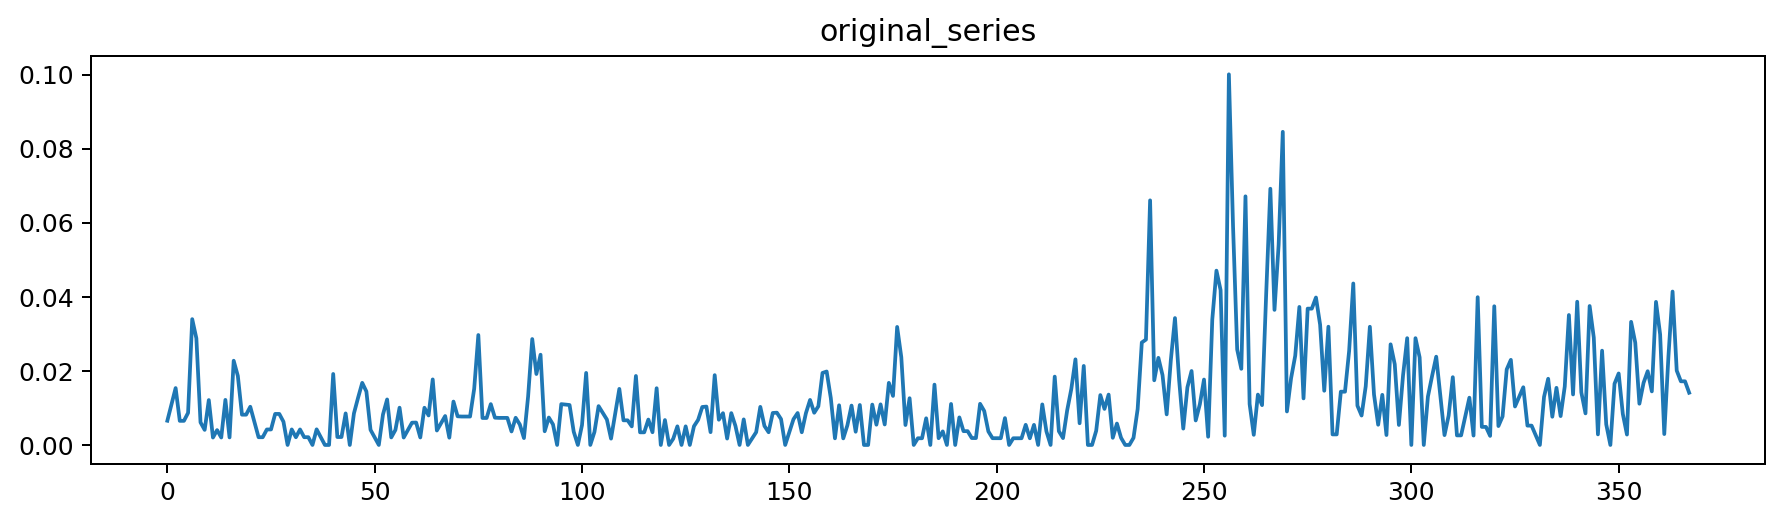

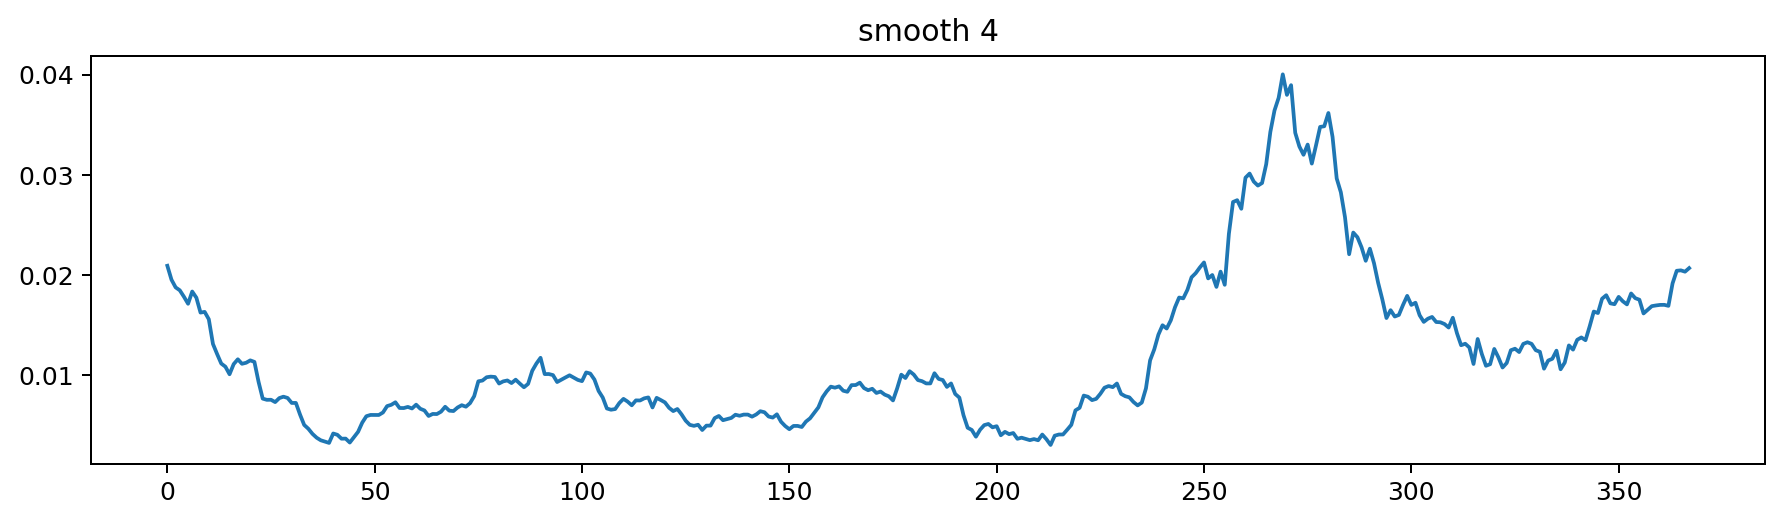

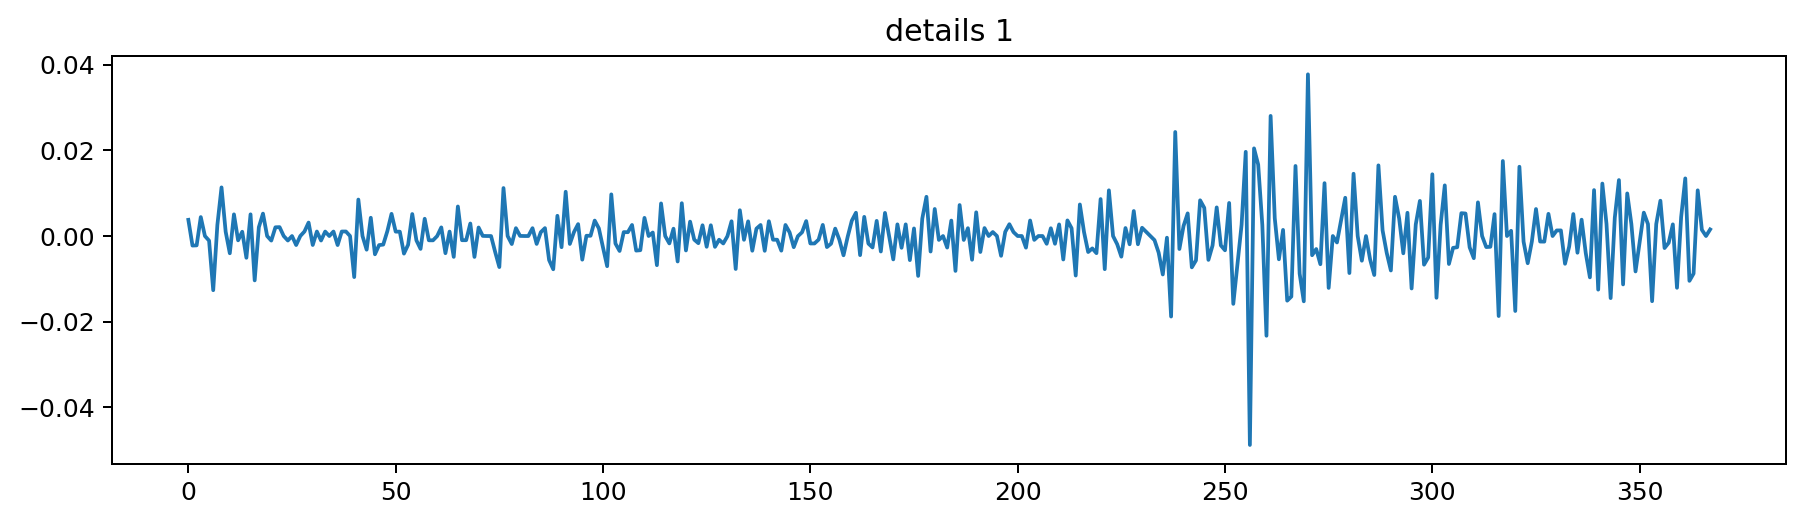

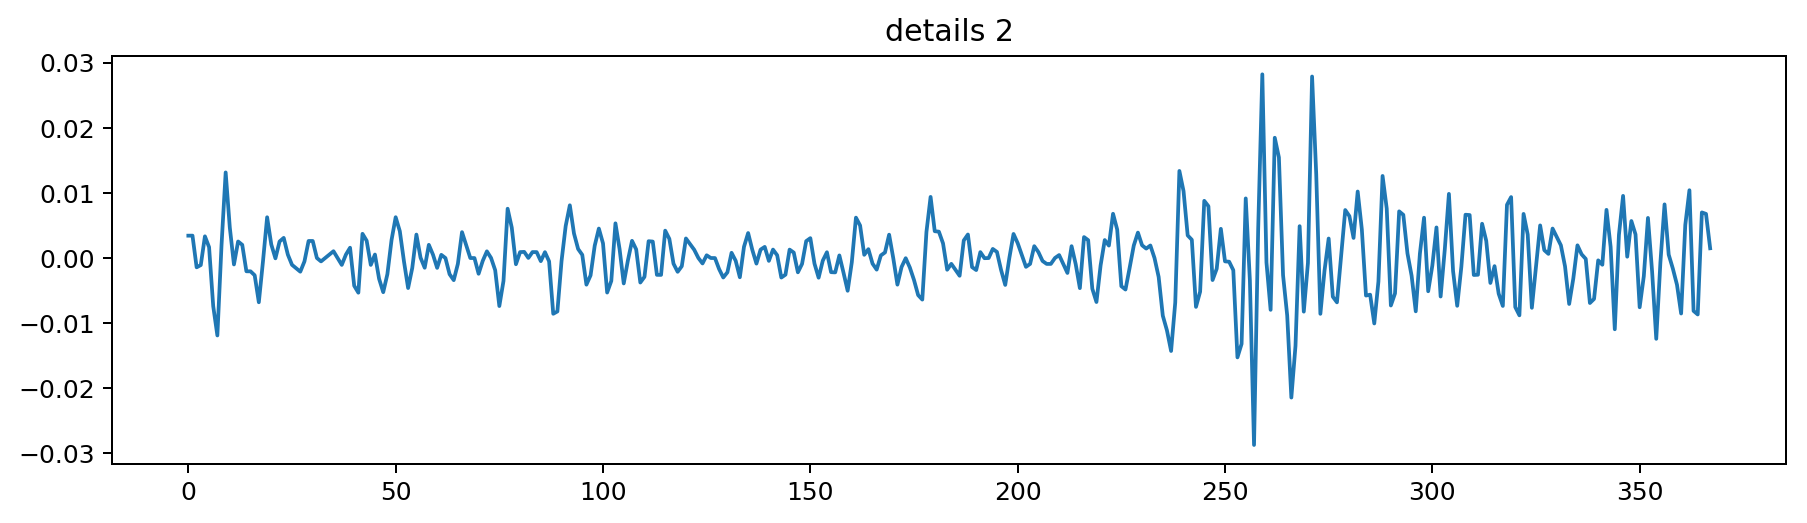

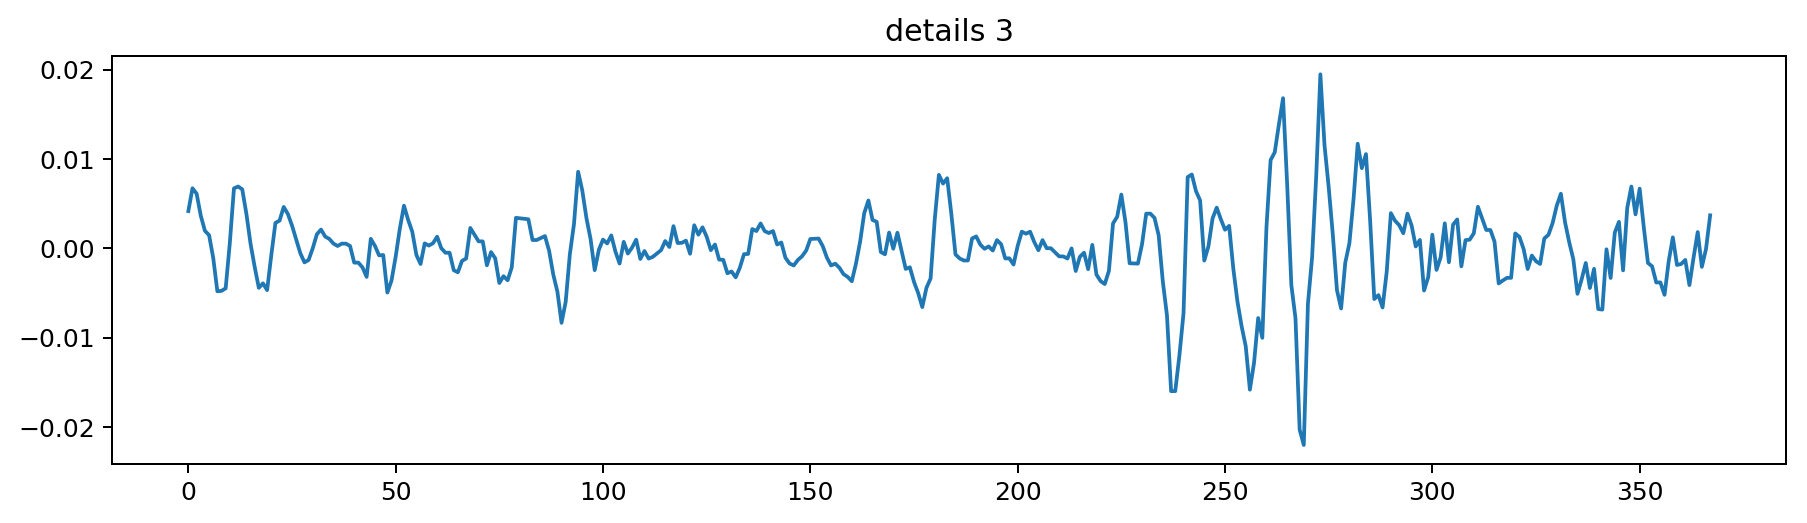

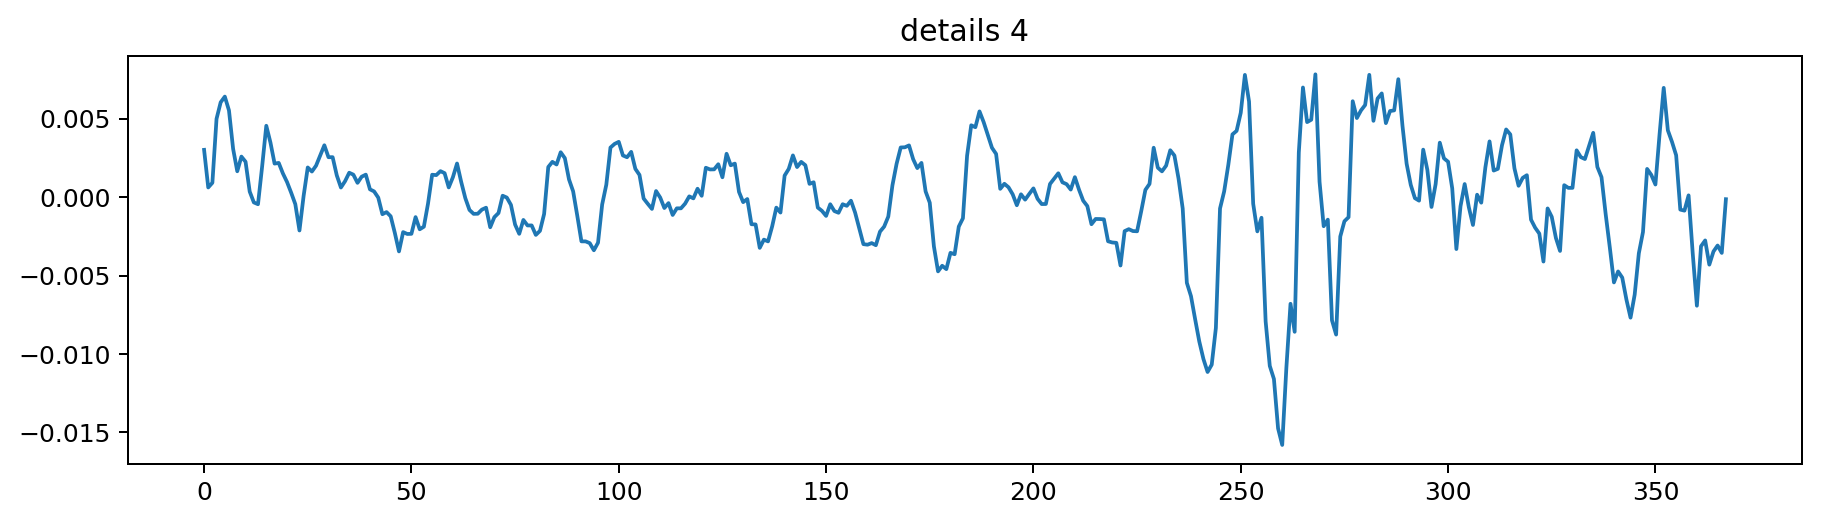

In [27]:
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()
data_transformed = modwt(v_n, "haar", level=4)
a = data_transformed[4]
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.title("smooth "+str(4))
plt.plot(a)
plt.show()
for j in range(4):
    d = data_transformed[j]
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    
    plt.title("details "+str(j+1))
    plt.plot(d)
    plt.show()